In [29]:
"""
GENERAL NOTE: Please print out numbers (i.e., accuracies, plots, etc.) so they are displayed to me when I run your cells. Use python's print() 
function.
"""

# import everything you might need

import torch
import math
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error
import pandas as pd
from xgboost import XGBClassifier
import random
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import warnings

usingCollab = False

**QUESTION 1**

In [30]:
"""
Q1: Calculate the gradient of the f(x, y, z) = 7x2z - 2xy3 + 5z at (-1, -2, 3). What does this vector represent?

YOUR ANSWER HERE

df/dx = 14xz - 2y3
df/dy = -6xy2
df/dz = 7x2 + 5
gradient = [df/dx, df/dy, df/dz]

At (-1, -2, 3): 

df/dx = -26
df/dy = 24
df/dz = 12
gradient = [-26, 24, 12]

This vector shows the slope of the function f(x,y,z) in each direction x, y, and z at the point (-1, -2, 3)
"""

'\nQ1: Calculate the gradient of the f(x, y, z) = 7x2z - 2xy3 + 5z at (-1, -2, 3). What does this vector represent?\n\nYOUR ANSWER HERE\n\ndf/dx = 14xz - 2y3\ndf/dy = -6xy2\ndf/dz = 7x2 + 5\ngradient = [df/dx, df/dy, df/dz]\n\nAt (-1, -2, 3): \n\ndf/dx = -26\ndf/dy = 24\ndf/dz = 12\ngradient = [-26, 24, 12]\n\nThis vector shows the slope of the function f(x,y,z) in each direction x, y, and z at the point (-1, -2, 3)\n'

**QUESTION 2**

In [31]:
# Let me download the files for you

# For collab
if usingCollab:
    !wget https://github.com/jrgreen7/SYSC4906/releases/download/Ass1/train.csv
    !wget https://github.com/jrgreen7/SYSC4906/releases/download/Ass1/val.csv
    !wget https://github.com/jrgreen7/SYSC4906/releases/download/Ass1/test.csv

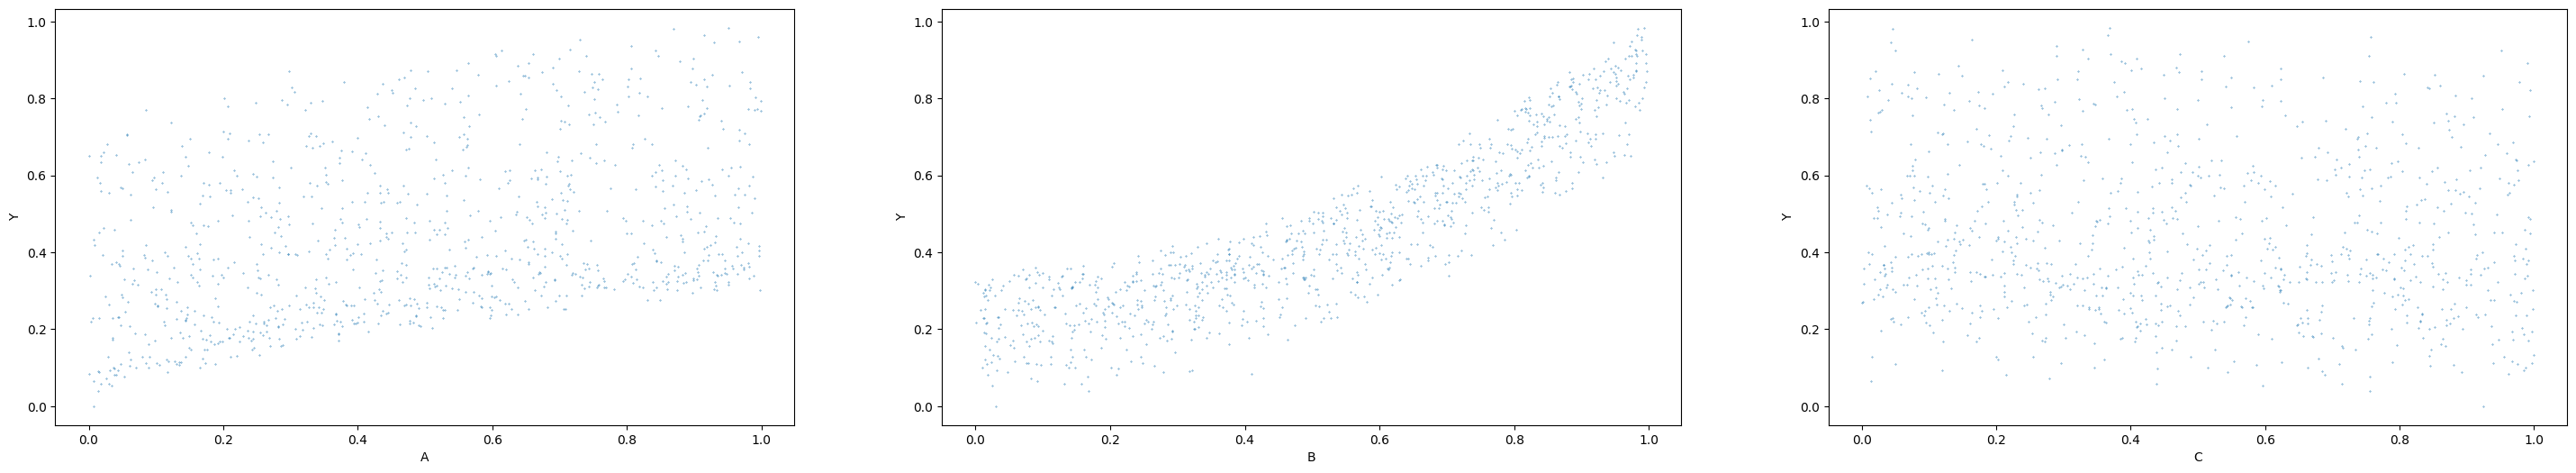

In [32]:
"""
Q2a: Use pandas to load train.csv, val.csv, and test.csv into three separate dataframes. Then, create three scatter plots of the train set 
with features A, B, and C on the x-axes and Y on the y-axes.

YOUR CODE BELOW, IN THIS CELL
"""

trainPath = 'https://github.com/jrgreen7/SYSC4906/releases/download/Ass1/train.csv'
testPath = 'https://github.com/jrgreen7/SYSC4906/releases/download/Ass1/val.csv'
valPath = 'https://github.com/jrgreen7/SYSC4906/releases/download/Ass1/test.csv'

trainingSet = pd.read_csv(trainPath)
testSet = pd.read_csv(testPath)
validationSet = pd.read_csv(valPath)

rFrame = pd.DataFrame(trainingSet, columns=['A', 'B', 'C', 'Y', 'Label'])
tFrame = pd.DataFrame(testSet, columns=['A', 'B', 'C', 'Y', 'Label'])
vFrame = pd.DataFrame(validationSet, columns=['A', 'B', 'C', 'Y', 'Label'])

ATrain = rFrame['A']
BTrain = rFrame['B']
CTrain = rFrame['C']
YTrain = rFrame['Y']

plt.figure(figsize=(36,6))

plt.subplot(1,3,1); plt.scatter(ATrain, YTrain, s=0.1); plt.xlabel('A'); plt.ylabel('Y')
plt.subplot(1,3,2); plt.scatter(BTrain, YTrain, s=0.1); plt.xlabel('B'); plt.ylabel('Y')
plt.subplot(1,3,3); plt.scatter(CTrain, YTrain, s=0.1); plt.xlabel('C'); plt.ylabel('Y')
plt.show()


In [33]:
"""
Q2b: If you were using A, B, and C to predict Y (i.e., using linear regression), how well do you think these features would perform? 
Do you think nonlinear functions would fit the data better? Why or why not?

YOUR ANSWER HERE

A linear function could fit B well, though a quadratic polynomial might be better. Using a linear model to predict Y using B should 
yield relatively good results. For A, the error is likely to be quite high since the variance is high, but an upward trend can still be 
spotted, so a linear model may still give an indication of a correct value but the error would be quite high and the condidence 
would be low. A non-linear model would work a lot better in this case. For C, a linear model would be absolutely useless as there seems
to be almost no correlation between C and Y. 
"""

""

''

In [34]:
"""
Q2c: The data is already normalized, how can you tell?

YOUR CODE AND ANSWER BELOW, IN THIS CELL

The range for both x and y fall between 0 and 1. this shows that the data has been normalized, since the ranges for the data all align. 
"""
''

''

In [35]:
"""
Q2d: For each of the three input features, compute its square-root to create 3 additional features. Repeat for squaring the feature values to 
create another 3 features. You now have 9 total input features: A, B, C, sqrt(A), sqrt(B), sqrt(C), A2, B2, C2. 
Do this for all three data splits (train, val, and test). You can think of these as polynomial kernels used in SVMs.

YOUR CODE BELOW, IN THIS CELL
"""

# Train set feature expansion
rootATrain = np.sqrt(ATrain)
rootBTrain = np.sqrt(BTrain)
rootCTrain = np.sqrt(CTrain)

A2Train = ATrain**2
B2Train = BTrain**2
C2Train = CTrain**2

# Test set feature expansion
ATest = tFrame['A']
BTest = tFrame['B']
CTest = tFrame['C']

rootATest = np.sqrt(ATest)
rootBTest = np.sqrt(BTest)
rootCTest = np.sqrt(CTest)

A2Test = ATest**2
B2Test = BTest**2
C2Test = CTest**2

# Validation set feature expansion
AVal = vFrame['A']
BVal = vFrame['B']
CVal = vFrame['C']

rootAVal = np.sqrt(AVal)
rootBVal = np.sqrt(BVal)
rootCVal = np.sqrt(CVal)

A2Val = AVal**2
B2Val = BVal**2
C2Val = CVal**2

**QUESTION 3**

In [36]:
"""
Q3a: Train a linear regression model on the train set using only the 3 original input features.

YOUR CODE BELOW, IN THIS CELL
"""

X = rFrame[['A', 'B', 'C']]
Y = rFrame['Y']

linModel = LinearRegression().fit(X, Y)

In [37]:
"""
Q3b: What are the mean absolute errors of the train set, val set, and test sets using this model? Did the model overfit the train set?

YOUR CODE AND ANSWER BELOW, IN THIS CELL

The model did not overfit the train set, as can be seen between the nominal difference in error between the train set and the test and 
validation sets. This shows that the model has generalized well and can accurately predict new data. 

Mean absolute errors:
	Train Error:	0.04297622772687732
	Val Error:  	0.042993924495539175
	Test Error: 	0.04199595732420802
"""

rX = rFrame[['A', 'B', 'C']]
rY = rFrame['Y']

tX = tFrame[['A', 'B', 'C']]
tY = tFrame['Y']

vX = vFrame[['A', 'B', 'C']]
vY = vFrame['Y']

rY_predict = linModel.predict(rX)
tY_predict = linModel.predict(tX)
vY_predict = linModel.predict(vX)

rError = mean_absolute_error(y_true=rY, y_pred=rY_predict)
tError = mean_absolute_error(y_true=tY, y_pred=tY_predict)
vError = mean_absolute_error(y_true=vY, y_pred=vY_predict)

errors = f'Mean absolute errors:\n\tTrain Error:\t{rError}\n\tVal Error:  \t{vError}\n\tTest Error: \t{tError}'
print(errors)

Mean absolute errors:
	Train Error:	0.04297622772687732
	Val Error:  	0.04199595732420802
	Test Error: 	0.042993924495539175


In [38]:
"""
Q3c: What are the values of the 4 learned parameters (3 weights and 1 bias)? Do these values make sense given your scatter plots in Q2a?

YOUR CODE AND ANSWER BELOW, IN THIS CELL

Yes, these values make sense. The coefficients show that a slope of 0.268 fits the data best for A, showing its upward trend. B's weight 
shows it's upward trend as well, while C's weight shows that C has almost no correlation to Y. 

Model Weights: [ 0.26851499  0.66435995 -0.06032162]
Model Bias: 0.0030530675285197484
"""

bias, weights = linModel.intercept_, linModel.coef_

print(f"Model Weights: {weights}\nModel Bias: {bias}\nModel score: {linModel.score(rX, rY)}")

Model Weights: [ 0.26851499  0.66435995 -0.06032162]
Model Bias: 0.0030530675285197484
Model score: 0.940947967334164


In [39]:
"""
Q3d: Train another linear regression model using all 9 input features.

YOUR CODE BELOW, IN THIS CELL
"""

X = rFrame[['A', 'B', 'C']]

# To suppress pandas modifying a frame copy warning 
with warnings.catch_warnings() as w:
    warnings.simplefilter('ignore')
    
    # Add remaining 6 features to X value
    X['sqrdA'] = A2Train; X['sqrdB'] = B2Train; X['sqrdC'] = C2Train
    X['rootA'] = rootATrain; X['rootB'] = rootBTrain; X['rootC'] = rootCTrain
Y = rFrame['Y']

expandedLinModel = LinearRegression().fit(X, Y)

In [40]:
"""
Q3e: What are the mean absolute errors of each dataset, using this new model?

YOUR CODE BELOW, IN THIS CELL

    Train Error:	2.6489755248144267e-05
	Val Error:  	2.2842568580043866e-05
	Test Error: 	2.606980306407048e-05
"""
# Build training set
rX = rFrame[['A', 'B', 'C']]
rY = rFrame['Y']

# To suppress pandas modifying a frame copy warning 
with warnings.catch_warnings() as w:
    warnings.simplefilter('ignore')
    
    # Add remaining 6 features to rX value
    rX['sqrdA'] = A2Train; rX['sqrdB'] = B2Train; rX['sqrdC'] = C2Train
    rX['rootA'] = rootATrain; rX['rootB'] = rootBTrain; rX['rootC'] = rootCTrain


# Build test set
tX = tFrame[['A', 'B', 'C']]
tY = tFrame['Y']

# To suppress pandas modifying a frame copy warning 
with warnings.catch_warnings() as w:
    warnings.simplefilter('ignore')
    
    # Add remaining 6 features to tX value
    tX['sqrdA'] = A2Test; tX['sqrdB'] = B2Test; tX['sqrdC'] = C2Test
    tX['rootA'] = rootATest; tX['rootB'] = rootBTest; tX['rootC'] = rootCTest


# Build validation set
vX = vFrame[['A', 'B', 'C']]
vY = vFrame['Y']

# To suppress pandas modifying a frame copy warning 
with warnings.catch_warnings() as w:
    warnings.simplefilter('ignore')
    
    # Add remaining 6 features to vX value
    vX['sqrdA'] = A2Val; vX['sqrdB'] = B2Val; vX['sqrdC'] = C2Val
    vX['rootA'] = rootAVal; vX['rootB'] = rootBVal; vX['rootC'] = rootCVal

# Predict on model using input sets
rY_predict = expandedLinModel.predict(rX)
tY_predict = expandedLinModel.predict(tX)
vY_predict = expandedLinModel.predict(vX)

rError = mean_absolute_error(y_true=rY, y_pred=rY_predict)
tError = mean_absolute_error(y_true=tY, y_pred=tY_predict)
vError = mean_absolute_error(y_true=vY, y_pred=vY_predict)

errors = f'Mean absolute errors:\n\tTrain Error:\t{rError}\n\tVal Error:  \t{vError}\n\tTest Error: \t{tError}'
print(errors)

Mean absolute errors:
	Train Error:	2.6489755248144267e-05
	Val Error:  	2.606980306407048e-05
	Test Error: 	2.2842568580043866e-05


In [41]:
"""
Q3f: How many learned parameters are there for this model, and what are their values?

YOUR CODE AND ANSWER BELOW, IN THIS CELL

10 learned parameters, 9 weights and 1 bias. Values: 

Model Weights: [3.18658118e-03,  4.12904461e-04, -6.66706794e-02, 
                -1.14337648e-03, 6.63574154e-01,  1.43711935e-04,  
                3.29369858e-01,  5.77037044e-05,  1.93867238e-04]
Model Bias: 0.03170073560858805
"""

bias, weights = expandedLinModel.intercept_, expandedLinModel.coef_

print(f"Model Weights: {weights}\nModel Bias: {bias}\nModel score: {expandedLinModel.score(rX, rY)}")

Model Weights: [ 3.18658118e-03  4.12904461e-04 -6.66706794e-02 -1.14337648e-03
  6.63574154e-01  1.43711935e-04  3.29369858e-01  5.77037044e-05
  1.93867238e-04]
Model Bias: 0.03170073560858805
Model score: 0.9999998730655747


In [42]:
"""
Q3g: Which model performs better? How can you explain the difference in performance?

YOUR ANSWER HERE

The expanded model with 9 features performs a lot better, with a higher R^2 value and a far lower mean absolute error. The performance 
difference could come from transforming the features into a new kernel space to make them linearly separable, since both A and C were not
linearly correlated originally. 
"""

'\nQ3g: Which model performs better? How can you explain the difference in performance?\n\nYOUR ANSWER HERE\n\nThe expanded model with 9 features performs a lot better, with a higher R^2 value and a far lower mean absolute error. The performance \ndifference could come from transforming the features into a new kernel space to make them linearly separable, since both A and C were not\nlinearly correlated originally. \n'

**QUESTION 4**

In [43]:
"""
Q4a: Use scikit-learn to train a logistic regression model on the train set using only the 3 original features. Again, just use the 
default hyper-parameters.

YOUR CODE BELOW, IN THIS CELL
"""

logModel = LogisticRegression()

# Data prep
XTrain = rFrame[['A', 'B', 'C']]
labelTrain = rFrame['Label']

logModel.fit(X=XTrain, y=labelTrain)

LogisticRegression()

In [44]:
"""
Q4b: What are the overall accuracies of the train, val, and test sets? Use scikit-learn's accuracy_score metric.

YOUR CODE BELOW, IN THIS CELL

Accuracy scores:
	Train:	0.528
	Val:  	0.481
	Test: 	0.452
"""
XTest = tFrame[['A', 'B', 'C']]
labelTest = tFrame['Label']

XVal = vFrame[['A', 'B', 'C']]
labelVal = vFrame['Label']

predLabelTrain = logModel.predict(X=XTrain)
predLabelTest = logModel.predict(X=XTest)
predLabelVal = logModel.predict(X=XVal)

trainScore = accuracy_score(labelTrain, predLabelTrain)
testScore = accuracy_score(labelTest, predLabelTest)
valScore = accuracy_score(labelVal, predLabelVal)

errors = f'Accuracy scores:\n\tTrain:\t{trainScore}\n\tVal:  \t{testScore}\n\tTest: \t{valScore}'
print(errors)

Accuracy scores:
	Train:	0.528
	Val:  	0.452
	Test: 	0.481


In [45]:
"""
Q4c: Train another logistic regression model on the train set using all 9 features. If it doesn't converge, set max_iter to 5,000.

YOUR CODE BELOW, IN THIS CELL
"""

# Build training set
XTrainExt = rFrame[['A', 'B', 'C']]
labelTrainExt = rFrame['Label']

# To suppress pandas modifying a frame copy warning 
with warnings.catch_warnings() as w:
    warnings.simplefilter('ignore')
    
    # Add remaining 6 features to rX value
    XTrainExt['sqrdA'] = A2Train; XTrainExt['sqrdB'] = B2Train; XTrainExt['sqrdC'] = C2Train
    XTrainExt['rootA'] = rootATrain; XTrainExt['rootB'] = rootBTrain; XTrainExt['rootC'] = rootCTrain


# Build test set
XTestExt = tFrame[['A', 'B', 'C']]
labelTestExt = tFrame['Label']

# To suppress pandas modifying a frame copy warning 
with warnings.catch_warnings() as w:
    warnings.simplefilter('ignore')
    
    # Add remaining 6 features to tX value
    XTestExt['sqrdA'] = A2Test; XTestExt['sqrdB'] = B2Test; XTestExt['sqrdC'] = C2Test
    XTestExt['rootA'] = rootATest; XTestExt['rootB'] = rootBTest; XTestExt['rootC'] = rootCTest


# Build validation set
XValExt = vFrame[['A', 'B', 'C']]
labelValExt = vFrame['Label']

# To suppress pandas modifying a frame copy warning 
with warnings.catch_warnings() as w:
    warnings.simplefilter('ignore')
    
    # Add remaining 6 features to vX value
    XValExt['sqrdA'] = A2Val; XValExt['sqrdB'] = B2Val; XValExt['sqrdC'] = C2Val
    XValExt['rootA'] = rootAVal; XValExt['rootB'] = rootBVal; XValExt['rootC'] = rootCVal

expandedLogModel = LogisticRegression(max_iter=5000).fit(XTrainExt, labelTrainExt)

In [46]:
"""
Q4d: Repeat b, but with your new logistic regression model.

YOUR CODE BELOW, IN THIS CELL

Accuracy scores:
	Train:	0.635
	Val:  	0.579
	Test: 	0.559
"""

predLabelTrain = expandedLogModel.predict(X=XTrainExt)
predLabelTest = expandedLogModel.predict(X=XTestExt)
predLabelVal = expandedLogModel.predict(X=XValExt)

trainScore = accuracy_score(labelTrainExt, predLabelTrain)
testScore = accuracy_score(labelTestExt, predLabelTest)
valScore = accuracy_score(labelValExt, predLabelVal)

errors = f'Accuracy scores:\n\tTrain:\t{trainScore}\n\tVal:  \t{testScore}\n\tTest: \t{valScore}'
print(errors)

Accuracy scores:
	Train:	0.635
	Val:  	0.559
	Test: 	0.579


In [47]:
"""
Q4e: XGBoost is pre-installed on Google Colab. One hyper-parameter is the depth of the tree (called max_depth). Find the optimal value of max_depth, all other hyper-parameters can be ignored for this question.
That is, your model should look like: model = XGBClassifier(max_depth=L).fit(X,y). 
Hint: the test set should not be used to search for hyper-parameters. Train these models using only the 3 original features.

YOUR CODE BELOW, IN THIS CELL

The ideal depth is 11 using the original 3 featues, and the corresponding score was 84.9% accuracy
"""
# Build train set
XTrain = rFrame[['A', 'B', 'C']]
labelTrain = rFrame['Label']

# Build test set
XTest = tFrame[['A', 'B', 'C']]
labelTest = tFrame['Label']

# Build validation set
XVal = vFrame[['A', 'B', 'C']]
labelVal = vFrame['Label']

highScore = 0
optimalDepth = 1

for depth in range(1,20):
    dTreeModel = XGBClassifier(max_depth=depth).fit(XTrain, labelTrain)
    predLabelVal = dTreeModel.predict(XVal)
    score = accuracy_score(labelVal, predLabelVal)
    if highScore < score:
        optimalDepth = depth
        highScore = score

print("High Score: ", highScore*100, "%, Optimal Tree Depth: ", optimalDepth)

High Score:  85.1 %, Optimal Tree Depth:  10


In [48]:
"""
Q4f: Repeat Step b, but with your new XGBoost model (with the max_depth chosen from e).

YOUR CODE BELOW, IN THIS CELL

Accuracy scores:
	Train:	1.0
	Val:  	0.85
	Test: 	0.849
"""


# Build data sets
XTrain = rFrame[['A', 'B', 'C']]
labelTrain = rFrame['Label']

XTest = tFrame[['A', 'B', 'C']]
labelTest = tFrame['Label']

XVal = vFrame[['A', 'B', 'C']]
labelVal = vFrame['Label']

# Train model
dTreeModel = XGBClassifier(max_depth=optimalDepth).fit(XTrain, labelTrain)

predLabelTrain = dTreeModel.predict(X=XTrain)
predLabelTest = dTreeModel.predict(X=XTest)
predLabelVal = dTreeModel.predict(X=XVal)

trainScore = accuracy_score(labelTrain, predLabelTrain)
testScore = accuracy_score(labelTest, predLabelTest)
valScore = accuracy_score(labelVal, predLabelVal)

errors = f'Accuracy scores:\n\tTrain:\t{trainScore}\n\tVal:  \t{testScore}\n\tTest: \t{valScore}'
print(errors)

Accuracy scores:
	Train:	1.0
	Val:  	0.839
	Test: 	0.851


In [49]:
"""
Q4g: Of your 3 models—two logistic regression models and one XGBoost model—which performs best on the test set? Why do you think this is the case?

YOUR ANSWER HERE

The decision tree model performs the best on this test set, with an accuracy of 100% on the training set and 84.9% and 85% on the validation and 
test sets respectively. This is likely because 2 of the features were inherently non-linear, as could be seen from the scatter plots in 2a. Since 
the decision tree doesn't use a linear function to learn, the data was better separated by this model than the Logistic regression model which is
a generalized linear model. 
"""

"\nQ4g: Of your 3 models—two logistic regression models and one XGBoost model—which performs best on the test set? Why do you think this is the case?\n\nYOUR ANSWER HERE\n\nThe decision tree model performs the best on this test set, with an accuracy of 100% on the training set and 84.9% and 85% on the validation and \ntest sets respectively. This is likely because 2 of the features were inherently non-linear, as could be seen from the scatter plots in 2a. Since \nthe decision tree doesn't use a linear function to learn, the data was better separated by this model than the Logistic regression model which is\na generalized linear model. \n"

**QUESTION 5**

In [50]:
"""
Q5a: Using all 9 input features, we want to train a linear model (i.e., torch.nn.Linear) to predict the class label.
This is a multi-class classification problem, which of the following loss functions, available in PyTorch, best suits our task? Explain briefly.
torch.nn.CrossEntropyLoss()
torch.nn.MSELoss()
torch.nn.BCELoss()


YOUR ANSWER HERE

Cross entropy loss is the ideal loss function in this scenario, since we are performing multiclass classification. MSE is ideal for regression 
tasks and continuous data, while BCE is best for binary classification. Cross Entropy Loss is designed for multiclass classification, and thus
best fits this problem. 
"""

'\nQ5a: Using all 9 input features, we want to train a linear model (i.e., torch.nn.Linear) to predict the class label.\nThis is a multi-class classification problem, which of the following loss functions, available in PyTorch, best suits our task? Explain briefly.\ntorch.nn.CrossEntropyLoss()\ntorch.nn.MSELoss()\ntorch.nn.BCELoss()\n\n\nYOUR ANSWER HERE\n\nCross entropy loss is the ideal loss function in this scenario, since we are performing multiclass classification. MSE is ideal for regression \ntasks and continuous data, while BCE is best for binary classification. Cross Entropy Loss is designed for multiclass classification, and thus\nbest fits this problem. \n'

In [51]:
"""
Q5b: Your model will output 10 numbers, one for each class.
These are called logits. Do you need to compute the softmax across these 10 logits before applying your loss function (from a), or does 
the loss function compute the softmax for you?

YOUR ANSWER HERE

Cross entropy loss computes the softmax implicitly, so there is no need to compute the softmax across the 10 logits prior to applying the 
loss function. 
"""

'\nQ5b: Your model will output 10 numbers, one for each class.\nThese are called logits. Do you need to compute the softmax across these 10 logits before applying your loss function (from a), or does \nthe loss function compute the softmax for you?\n\nYOUR ANSWER HERE\n\nCross entropy loss computes the softmax implicitly, so there is no need to compute the softmax across the 10 logits prior to applying the \nloss function. \n'

In [53]:
"""
Q5c: Using the loss function from a, train a linear model using PyTorch and stochastic gradient descent (SGD).
Use a batch size of 1, a learning rate of 0.3 and train for 200 epochs. You can update your model weights “manually” or use an optimizer.

YOUR CODE BELOW, IN THIS CELL
"""

trainFeaturesInput = []
trainFeaturesOutput = []
# Build feature vector using train set 
for i in range(1000):
    feature = []
    for iName in ['A', 'B', 'C', 'sqrdA', 'sqrdB', 'sqrdC', 'rootA', 'rootB', 'rootC']:
        feature += [XTrainExt[iName][i]]
    
    feature = torch.Tensor(feature).unsqueeze(0)
    trainFeaturesInput += [feature]

    feature = [rFrame['Label'][i]]
    feature = torch.Tensor(feature).unsqueeze(0)
    trainFeaturesOutput += [feature]

trainFeaturesInput = torch.cat(trainFeaturesInput, dim=0)
trainFeaturesOutput = torch.cat(trainFeaturesOutput, dim=0)

trainInput = TensorDataset(trainFeaturesInput, trainFeaturesOutput)

# Build feature vector using val set 
valFeaturesInput = []
valFeaturesOutput = []

for i in range(1000):
    feature = []
    for iName in ['A', 'B', 'C', 'sqrdA', 'sqrdB', 'sqrdC', 'rootA', 'rootB', 'rootC']:
        feature += [XValExt[iName][i]]

    feature = torch.Tensor(feature).unsqueeze(0)
    valFeaturesInput += [feature]

    feature = [vFrame['Label'][i]]
    feature = torch.Tensor(feature).unsqueeze(0)
    valFeaturesOutput += [feature]

valFeaturesInput = torch.cat(valFeaturesInput, dim=0)
valFeaturesOutput = torch.cat(valFeaturesOutput, dim=0)

valInput = TensorDataset(valFeaturesInput, valFeaturesOutput)

# Build feature vector using test set 
testFeaturesInput = []
testFeaturesOutput = []

for i in range(1000):
    feature = []
    for iName in ['A', 'B', 'C', 'sqrdA', 'sqrdB', 'sqrdC', 'rootA', 'rootB', 'rootC']:
        feature += [XTestExt[iName][i]]

    feature = torch.Tensor(feature).unsqueeze(0)
    testFeaturesInput += [feature]

    feature = [tFrame['Label'][i]]
    feature = torch.Tensor(feature).unsqueeze(0)
    testFeaturesOutput += [feature]

testFeaturesInput = torch.cat(testFeaturesInput, dim=0)
testFeaturesOutput = torch.cat(testFeaturesOutput, dim=0)

testInput = TensorDataset(valFeaturesInput, valFeaturesOutput)


learningRate = 0.3
batchSize = 1

trainLoader = DataLoader(trainInput, batch_size=batchSize, shuffle=False)
testLoader = DataLoader(testInput, batch_size=batchSize, shuffle=False)
valLoader = DataLoader(valInput, batch_size=batchSize, shuffle=False)


torchLinModel = torch.nn.Linear(9,10)
lossFn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(torchLinModel.parameters(), lr=learningRate)
numEpochs = 200

for epoch in range(numEpochs):
    trainLosses = []
    for batch in trainLoader:
        batchInput = batch[0]
        batchOutput = batch[1] 
        output = torchLinModel(batchInput)
        loss = lossFn(batchOutput, output)
        
        trainLosses += [loss.item()]

        loss.backward()
        optimizer.step()
        # optimizer.zero_grad()

    if (epoch % 10) == 0:
        y_hat = []
        y = []
        with torch.no_grad():
            for valBatch in valLoader:
                valBatchInput = valBatch[0]
                valBatchOutput = valBatch[1]

                out = torchLinModel(valBatchInput)
                y_hat += [out]
                y += [valBatchOutput]

        y_hat = torch.cat(y_hat, dim=0)
        y = torch.cat(y, dim=0)

        print(f'Y shape: {y.shape}, yhat shape: {y_hat.shape}')
        testLossMean = lossFn(y_hat, y)

        trainLossMean = torch.Tensor(trainLosses).mean().item()
        print(f'Epoch: {epoch+1}, train loss: {trainLossMean}, test loss: {testLossMean}')
        

RuntimeError: 0D or 1D target tensor expected, multi-target not supported

In [53]:
"""
Q5d: Use the trained model to make predictions on the val and test sets. Calculate the overall accuracy of both sets.

YOUR CODE BELOW, IN THIS CELL
"""



valInput Size: torch.Size([1000, 9])
valOutput Size: torch.Size([1000, 1])
testInput Size: torch.Size([1000, 9])
testOutput Size: torch.Size([1000, 1])


In [44]:
"""
Q5e: Repeat parts c and d three times. You should get different results each run. There are two main reasons for this. What are they?

YOUR CODE AND ANSWER BELOW, IN THIS CELL
"""

'\nQ5e: Repeat parts c and d three times. You should get different results each run. There are two main reasons for this. What are they?\n\nYOUR CODE AND ANSWER BELOW, IN THIS CELL\n'